In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('real_estate_data.csv')


In [5]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [6]:
pd.set_option('display.max_columns',100)

In [8]:
print(df.dtypes)

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object


In [9]:
print(df.select_dtypes(include = ['object']).isnull().sum())

property_type       0
exterior_walls    223
roof              354
dtype: int64


In [10]:
print(df.select_dtypes(exclude = ['object']).isnull().sum())

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64


In [11]:
print(df.basement.unique())

[nan  1.]


In [13]:
df.loc[df['basement']!=1,['basement']]=[0]


In [14]:
print(df.select_dtypes(exclude = ['object']).isnull().sum())

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64


In [15]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


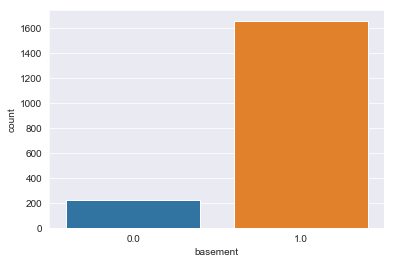

In [16]:

sns.countplot(x=df.basement)
plt.show()


In [17]:
print(df.describe())

            tx_price         beds        baths         sqft   year_built  \
count    1883.000000  1883.000000  1883.000000  1883.000000  1883.000000   
mean   422839.807754     3.420605     2.579926  2329.398832  1982.963887   
std    151462.593276     1.068554     0.945576  1336.991858    20.295945   
min    200000.000000     1.000000     1.000000   500.000000  1880.000000   
25%    300000.000000     3.000000     2.000000  1345.000000  1970.000000   
50%    392000.000000     3.000000     3.000000  1907.000000  1986.000000   
75%    525000.000000     4.000000     3.000000  3005.000000  2000.000000   
max    800000.000000     5.000000     6.000000  8450.000000  2015.000000   

           lot_size     basement  restaurants    groceries    nightlife  \
count  1.883000e+03  1883.000000  1883.000000  1883.000000  1883.000000   
mean   1.339262e+04     0.879979    40.210303     4.505045     5.074881   
std    4.494930e+04     0.325073    46.867012     4.491029     8.464668   
min    0.000000

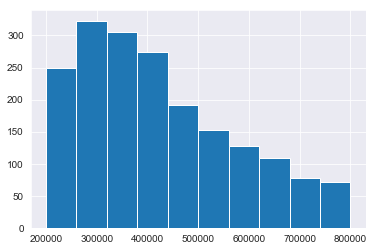

In [18]:
df.tx_price.hist()
plt.show()

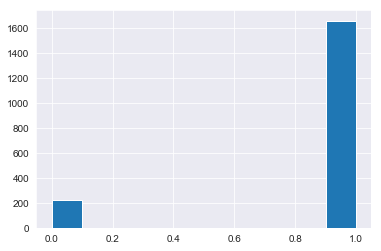

In [19]:
df.basement.hist()
plt.show()

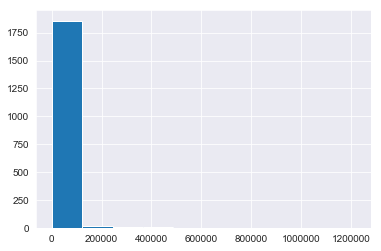

In [20]:
df.lot_size.hist()
plt.show()

In [21]:
df.lot_size.describe()

count    1.883000e+03
mean     1.339262e+04
std      4.494930e+04
min      0.000000e+00
25%      1.542000e+03
50%      6.098000e+03
75%      1.176100e+04
max      1.220551e+06
Name: lot_size, dtype: float64

In [22]:
(df.sort_values(by = ['lot_size'],ascending = False))[['lot_size','basement']].head()

,lot_size,basement
102,1220551,0.0
1111,436471,1.0
1832,436035,1.0
1876,436035,1.0
1839,435600,1.0


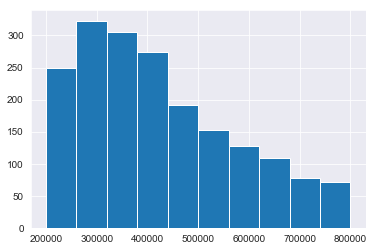

In [23]:

df.tx_price.hist()
plt.show()

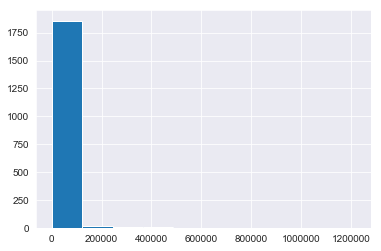

In [24]:
df.lot_size.hist()
plt.show()

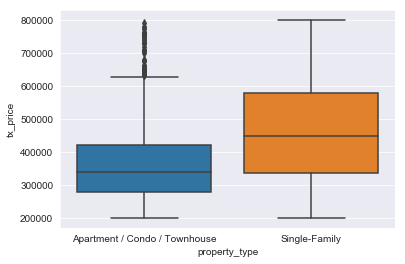

In [26]:
sns.boxplot(x=df.property_type, y=df.tx_price)
plt.show()

In [27]:
df.groupby('property_type').describe()

tx_price                                \
                                 count           mean            std   
property_type                                                          
Apartment / Condo / Townhouse    803.0  366614.034869  121784.490486   
Single-Family                   1080.0  464644.711111  157758.739013   

                                                                       \
                                    min       25%       50%       75%   
property_type                                                           
Apartment / Condo / Townhouse  200000.0  280000.0  340000.0  419950.0   
Single-Family                  200000.0  336875.0  450000.0  579120.0   

                                           beds                                \
                                    max   count      mean       std  min  25%   
property_type                                                                   
Apartment / Condo / Townhouse  790830.0   803.0  2.601494  0.810220  1.0  2.0   
Single-Family                  800000.0  1080.0  4.029630  0.795639  1.0  4.0   

                                               baths                           \
                               50%  75%  max   count      mean       std  min   
property_type                                                                   
Apartment / Condo / Townhouse  3.0  3.0  5.0   803.0  2.200498  0.815009  1.0   
Single-Family                  4.0  5.0  5.0  1080.0  2.862037  0.937551  1.0   

                                                     sqft               \
                               25%  50%  75%  max   count         mean   
property_type                                                            
Apartment / Condo / Townhouse  2.0  2.0  3.0  5.0   803.0  1513.727273   
Single-Family                  2.0  3.0  3.0  6.0  1080.0  2935.865741   

                                                                           \
                                       std    min     25%     50%     75%   
property_type                                                               
Apartment / Condo / Townhouse   556.286650  500.0  1107.5  1428.0  1808.0   
Single-Family                  1422.871169  642.0  1800.0  2663.0  3855.5   

                                      year_built                          \
                                  max      count         mean        std   
property_type                                                              
Apartment / Condo / Townhouse  4300.0      803.0  1988.936488  15.513640   
Single-Family                  8450.0     1080.0  1978.523148  22.210582   

                                                                       \
                                  min     25%     50%     75%     max   
property_type                                                           
Apartment / Condo / Townhouse  1940.0  1981.0  1991.0  2001.0  2014.0   
Single-Family                  1880.0  1962.0  1980.0  1999.0  2015.0   

                              lot_size                                   \
                                 count          mean           std  min   
property_type                                                             
Apartment / Condo / Townhouse    803.0   3944.239103  44284.168767  0.0   
Single-Family                   1080.0  20417.666667  44165.529302  0.0   

                                                                   basement  \
                                  25%      50%      75%        max    count   
property_type                                                                 
Apartment / Condo / Townhouse     0.0   1424.0   2077.0  1220551.0    803.0   
Single-Family                  8196.0  10758.5  16117.0   436471.0   1080.0   

                                         ... married        college_grad  \
                                   mean  ...     75%    max        count   
property_type                            ...                   

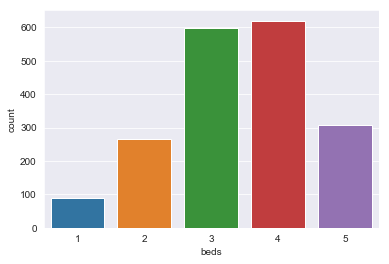

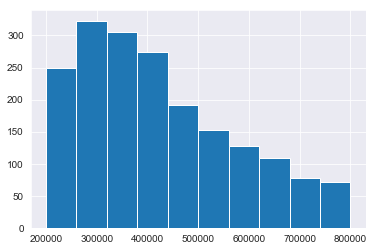

In [28]:
sns.countplot(x =df.beds)
plt.show()
df.tx_price.hist()
plt.show()


In [29]:
df_correlations=df.corr()


In [30]:
df_correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,0.109479,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,0.414633,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,0.344108,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,0.270308,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,0.008846,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,0.011123,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,0.109479,0.414633,0.344108,0.270308,0.008846,0.011123,1.000000,-0.456759,-0.270735,-0.516373,-0.419202,-0.271279,-0.470545,-0.337146,-0.533192,0.111580,0.447285,-0.138711,0.184327,0.138771,0.005044,-0.115432,-0.070075
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,-0.456759,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,-0.270735,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,-0.516373,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


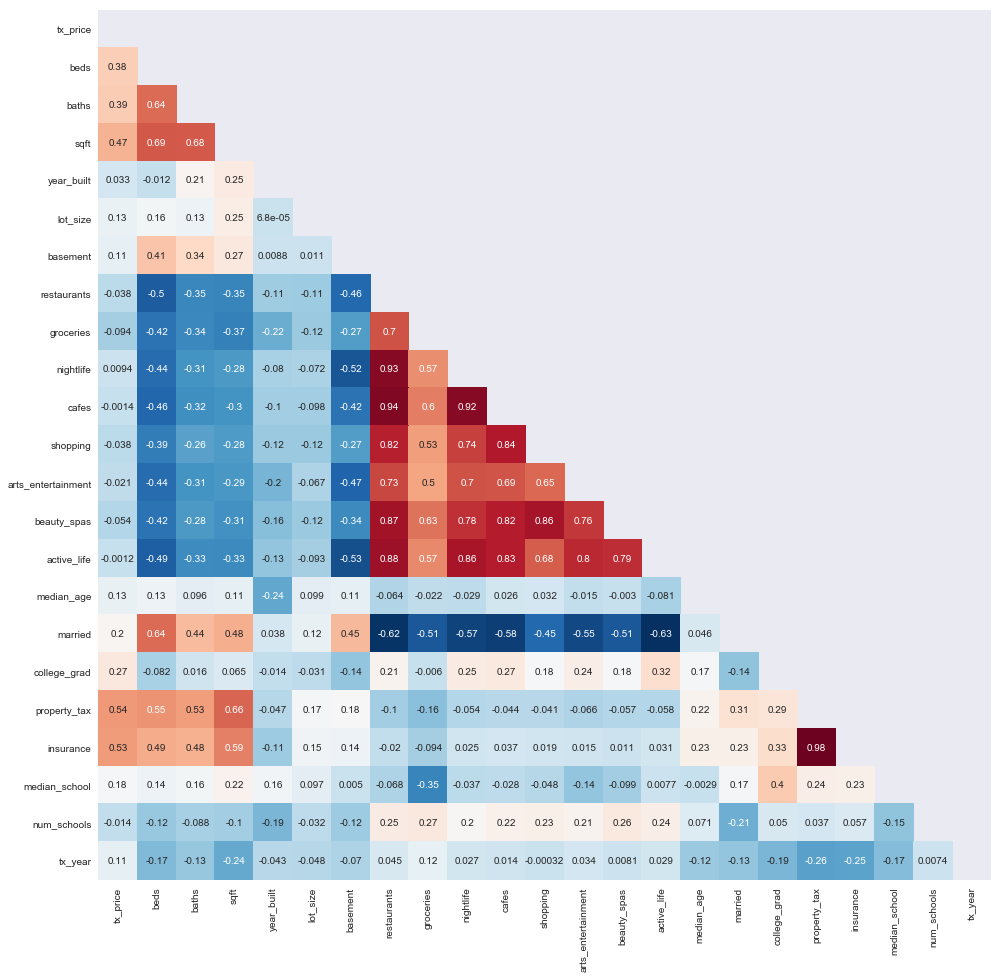

In [34]:
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (16,16))
#ig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_correlations,cmap='RdBu_r',annot=True,mask = mask,cbar = False)
plt.show()


In [35]:
#removing unwanted data observations
#duplicate observations
#irreleveant observations

df = df.drop_duplicates()
df.shape


(1883, 26)

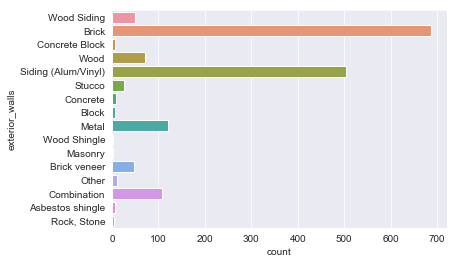

In [36]:
sns.countplot(y = df.exterior_walls)
plt.show()

In [38]:
df['basement']=df.fillna(0)

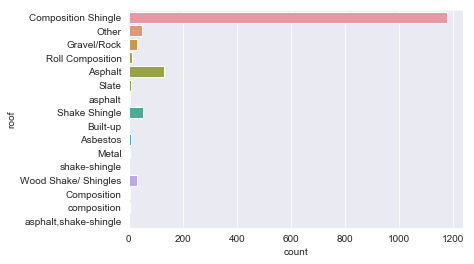

In [40]:
sns.countplot(y = df.roof)
plt.show()

In [41]:
df.roof.replace('shake-shingle', 'Shake Shingle', inplace=True)

In [42]:
df.roof.replace('composition', 'Composition', inplace=True)

In [44]:
df.roof.replace('asphalt', 'Asphalt', inplace=True)

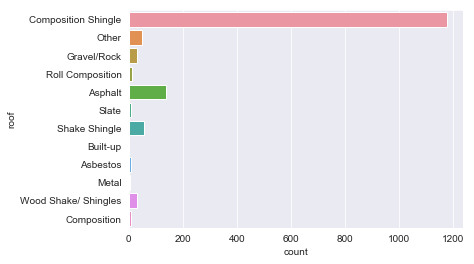

In [45]:
sns.countplot(y = df.roof)
plt.show()

In [46]:
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

In [47]:
df.exterior_walls.replace(['Concrete', 'Block'],'Concrete Block', inplace = True)

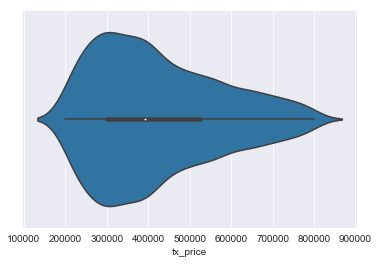

In [48]:
sns.violinplot(df.tx_price)

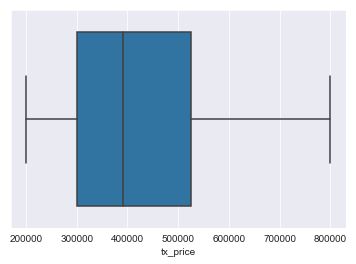

In [49]:
sns.boxplot(df.tx_price)

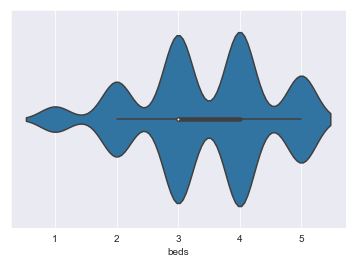

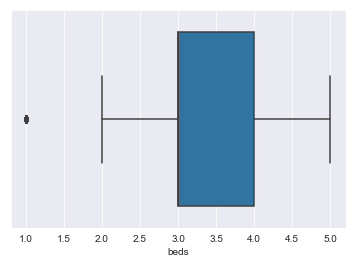

In [50]:
sns.violinplot(df.beds)
plt.show()
sns.boxplot(df.beds)
plt.show()

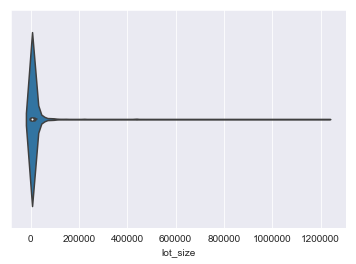

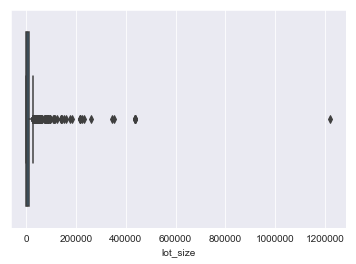

In [51]:
sns.violinplot(df.lot_size)
plt.show()
sns.boxplot(df.lot_size)
plt.show()

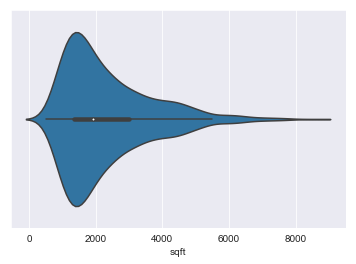

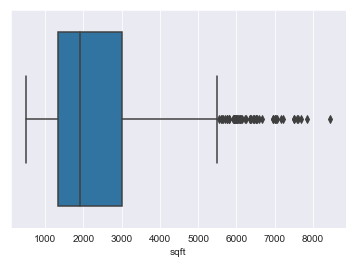

In [52]:
sns.violinplot(df.sqft)
plt.show()
sns.boxplot(df.sqft)
plt.show()

In [53]:
df.lot_size.sort_values(ascending = False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [54]:
df = df[df.lot_size <= 50000]

In [55]:
print(df.shape)

(1813, 26)


In [56]:
df.exterior_walls.replace(np.nan,'Missing',inplace = True)

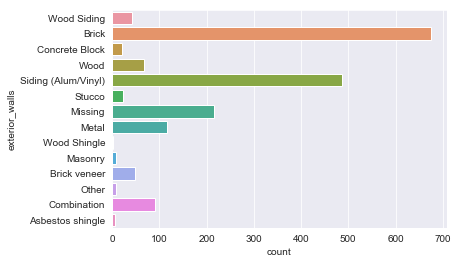

In [57]:
sns.countplot(y=df.exterior_walls)

In [58]:
df.select_dtypes(include = ['object']).isnull().sum()

property_type       0
exterior_walls      0
roof              329
basement            0
dtype: int64

In [60]:
df.roof.replace(np.nan,'Missing',inplace = True)

In [61]:
df.select_dtypes(include = ['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
basement          0
dtype: int64

In [72]:
df['two_and_two'] = ((df.beds==2) & (df.baths==2)).astype(int)

In [63]:
df.two_and_two.mean()

0.09707666850523994

In [73]:
df['during_recesion'] =((df.tx_year>=2010)&(df.tx_year<=2013)).astype(int)

In [65]:
df.during_recesion.mean()

0.26309983452840596

In [76]:
#interaction features are operations between two or more features
#ex:- property age
df['property_age']= df.tx_year - df.year_built

In [67]:
df = df[df.property_age>=0]

In [68]:
df = pd.read_csv('cleaned_data.csv')

In [77]:
df.shape

(1813, 29)

In [74]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recesion
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0


In [78]:
df['school_quality']=df.median_school*df.num_schools

In [79]:
df.to_csv('engineered_data.csv',index = False)

In [80]:
from sklearn.linear_model import ElasticNet,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split 

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

In [83]:
y = df.tx_price
df1 = df.select_dtypes(exclude= ['object'])
x = df1.drop('tx_price',axis=1)

In [106]:
#df.select_dtypes(include = ['object']).isnull().sum()
#sns.countplot(y=df.exterior_walls)
#plt.show()
#sns.countplot(y=df.property_type)
#plt.show()
#sns.countplot(y=df.roof)
#plt.show()
x_test_new = (x_test - x_train.mean())/x_train.std()
y_test_new = (y_test - y_train.mean())/y_train.std()
y_train_new = (y_train - y_train.mean())/y_train.std()
x_train_new = (x_train - x_train.mean())/x_train.std()
#x_train_new

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [87]:
make_pipeline(StandardScaler(),Lasso(random_state=123))

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [141]:
pipelines = {'lasso':make_pipeline(StandardScaler(),Lasso(random_state=123)), 'enet' : make_pipeline(StandardScaler(),ElasticNet(random_state=123)), 'ridge': make_pipeline(StandardScaler(),Ridge(random_state=123))}

In [142]:
pipelines['rf'] = make_pipeline(StandardScaler(),RandomForestRegressor(random_state=123))
pipelines['gb'] = make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=123))

In [143]:
for key,value in pipelines.items():
    print(key,type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [91]:
pipelines['Lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [98]:
lasso_hyperparameters={
    'lasso__alpha':[0.001,0.005,0.01,0.05,0.5,1,5,10]
    
}
ridge_hyperparameters={
    'ridge__alpha':[0.001,0.005,0.01,0.05,0.5,1,5,10]
}

In [94]:
enet_hyperparameters={
    'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.5,1,5,10],
    'elasticnet__l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9]
}

In [96]:
rf_hyperparameters={
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}

In [97]:
gb_hyperparameters={
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]


}

In [99]:
hyperparameters = {
    'rf':rf_hyperparameters,
    'gb':gb_hyperparameters,
    'lasso':lasso_hyperparameters,
    'ridge':ridge_hyperparameters,
    'enet':enet_hyperparameters
}

In [100]:
from sklearn.model_selection import GridSearchCV

In [103]:
model = GridSearchCV(pipelines['Lasso'],hyperparameters['lasso'],cv=10,n_jobs=-1)

In [104]:
type(model)

sklearn.model_selection._search.GridSearchCV

In [139]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, mi...123, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gradientboostingregressor__n_estimators': [100, 200], 'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2], 'gradientboostingregressor__max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [144]:
fitted_models = {}
for name, pipelines in pipelines.items():
    model =GridSearchCV(pipelines,hyperparameters[name],cv=10,n_jobs=-1)
    model.fit(x_train,y_train)
    fitted_models[name]=model
    print(name , 'has been fitted.')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


lasso has been fitted.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


enet has been fitted.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


ridge has been fitted.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been fitted.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been fitted.


dict_items([('lasso', Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))])), ('enet', Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=123, selection='cyclic', tol=0.0001, warm_start=False))])), ('ridge', Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001))])), ('rf', Pipeline(memory=None,
     steps

In [124]:
from sklearn.exceptions import NotFittedError

In [145]:
for name,model in fitted_models.items():
    try:
        pred = model.predict(x_test_new)
        print(name,'has been fitted')
    except NotFittedError as e:
        print(repr(e))
#making sure that the models have been correctlty fitted

lasso has been fitted
enet has been fitted
ridge has been fitted
rf has been fitted
gb has been fitted


In [128]:
#METRICS AND MODEL SELECTION


In [146]:
for name,model in fitted_models.items():
    print(name,model.best_score_)
#by default R2 scores are evaluated

lasso 0.46001796493631114
enet 0.462033876161321
ridge 0.46112380641696626
rf 0.794215079834245
gb 0.8093619350674867


In [131]:
from sklearn.metrics import r2_score

In [132]:
from sklearn.metrics import mean_absolute_error

In [148]:
for name,model in fitted_models.items():
    pred = model.predict(x_test)
    print(name)
    print('------')
    print('R2 :', r2_score(y_test,pred))
    print('MAE:', mean_absolute_error(y_test,pred))

lasso
------
R2 : 0.29038499231513415
MAE: 84154.46897888342
enet
------
R2 : 0.29215889638448644
MAE: 84831.67758927327
ridge
------
R2 : 0.28684174491739656
MAE: 84429.39089298189
rf
------
R2 : 0.8243752672983758
MAE: 44196.798760330574
gb
------
R2 : 0.8362653831610385
MAE: 42625.48127110388


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were 

In [138]:
#the selected model from the metrics is gb
#more R2 and less MAE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


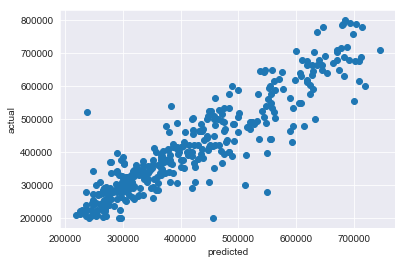

In [150]:
gb_pred = fitted_models['gb'].predict(x_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [153]:
import pickle
with open('final_model.pkl','wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_,f)